### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import sys

### Reading data

In [2]:
# Read the train, test, and validation datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
validation_df = pd.read_csv("validation.csv")


# Combine the datasets
ats_data = pd.concat([train_df, test_df, validation_df])

# Save the combined dataset
#ats_data.to_csv("combined.csv", index=False)

In [3]:
train_df.shape

(287113, 3)

In [4]:
test_df

,id,article,highlights
0,92c514c913c0bdfe25341af9fd72b29db544099b,Ever noticed how plane seats appear to be gett...,Experts question if packed out planes are put...
1,2003841c7dc0e7c5b1a248f9cd536d727f27a45a,A drunk teenage boy had to be rescued by secur...,Drunk teenage boy climbed into lion enclosure ...
2,91b7d2311527f5c2b63a65ca98d21d9c92485149,Dougie Freedman is on the verge of agreeing a ...,Nottingham Forest are close to extending Dougi...
3,caabf9cbdf96eb1410295a673e953d304391bfbb,Liverpool target Neto is also wanted by PSG an...,Fiorentina goalkeeper Neto has been linked wit...
4,3da746a7d9afcaa659088c8366ef6347fe6b53ea,Bruce Jenner will break his silence in a two-h...,"Tell-all interview with the reality TV star, 6..."
...,...,...,...
11485,ed8674cc15b29a87d8df8de1efee353d71122272,Our young Earth may have collided with a body ...,Oxford scientists say a Mercury-like body stru...
11486,2f58d1a99e9c47914e4b1c31613e3a041cd9011e,A man facing trial for helping his former love...,Man accused of helping former lover kill woman...
11487,411f6d57825161c3a037b4742baccd6cd227c0c3,A dozen or more metal implements are arranged ...,Marianne Power tried the tuning fork facial at...
11488,b5683ef8342056b17b068e0d59bdbe87e3fe44ea,Brook Lopez dominated twin brother Robin with ...,Brooklyn Nets beat the Portland Trail Blazers ...


In [5]:
ats_data.shape

(311971, 3)

In [6]:
ats_data

,id,article,highlights
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...
2,00027e965c8264c35cc1bc55556db388da82b07f,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t..."
3,0002c17436637c4fe1837c935c04de47adb18e9a,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...
...,...,...,...
13363,e93f721ba4949f21f33549c4a21d55ff456af979,All shops will be allowed to offer ‘click and ...,Shops won't have to apply for planning permiss...
13364,8df19a570ad14119a7d00f3bbe864fedf8c1691d,Mo Farah has had his nationality called into q...,Mo Farah broke the European half-marathon reco...
13365,2fdd5f89aa26e91ceea9b0ef264abfcfc3e6fa2e,Wolves kept their promotion hopes alive with a...,Wolves are three points off the play-off place...
13366,530d7b18d7a715b368b0745f9dfebfe353adeda8,A Brown University graduate student has died ...,"Hyoun Ju Sohn, a 25-year-old doctoral student,..."


In [7]:
ats_data = ats_data.drop("id", axis=1)

In [8]:
ats_data.article[0]

0    By . Associated Press . PUBLISHED: . 14:11 EST...
0    Ever noticed how plane seats appear to be gett...
0    Sally Forrest, an actress-dancer who graced th...
Name: article, dtype: object

In [9]:
ats_data.highlights[0]

0    Bishop John Folda, of North Dakota, is taking ...
0    Experts question if  packed out planes are put...
0    Sally Forrest, an actress-dancer who graced th...
Name: highlights, dtype: object

In [10]:
ats_data.loc[1, 'article'] = np.nan
ats_data.loc[122, 'article'] = np.nan
ats_data.loc[211, 'article'] = np.nan
ats_data.loc[51, 'article'] = np.nan
ats_data.loc[278, 'article'] = np.nan
ats_data.loc[218, 'article'] = np.nan
ats_data.loc[9024, 'article'] = np.nan
ats_data.loc[5216, 'article'] = np.nan
ats_data.loc[111, 'article'] = np.nan
ats_data.loc[222, 'article'] = np.nan
ats_data.loc[221, 'article'] = np.nan
ats_data.loc[151, 'article'] = np.nan
ats_data.loc[2078, 'article'] = np.nan
ats_data.loc[2118, 'article'] = np.nan
ats_data.loc[90124, 'article'] = np.nan
ats_data.loc[51216, 'article'] = np.nan
ats_data.loc[6522, 'article'] = np.nan
ats_data.loc[21221, 'article'] = np.nan
ats_data.loc[52121, 'article'] = np.nan
ats_data.loc[27338, 'article'] = np.nan
ats_data.loc[21118, 'article'] = np.nan
ats_data.loc[90214, 'article'] = np.nan
ats_data.loc[52316, 'article'] = np.nan
ats_data.loc[2, 'article'] = np.nan
ats_data.loc[12, 'article'] = np.nan
ats_data.loc[21, 'article'] = np.nan
ats_data.loc[513, 'article'] = np.nan
ats_data.loc[27, 'article'] = np.nan
ats_data.loc[28, 'article'] = np.nan
ats_data.loc[924, 'article'] = np.nan
ats_data.loc[516, 'article'] = np.nan

## Incomplete & Missing data

### Drop rows with missing values in any of the 3 columns.

In [11]:
#checking for null values
ats_data.isnull().sum()

article       77
highlights     0
dtype: int64

In [12]:
# Drop rows with missing values in 'id', 'article', or 'highlights' columns
ats_data.dropna(subset=['article', 'highlights'], inplace=True)

# Display the updated summary of the cleaned dataset
print(ats_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311894 entries, 0 to 13367
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   article     311894 non-null  object
 1   highlights  311894 non-null  object
dtypes: object(2)
memory usage: 7.1+ MB
None


## Noisy Data


### Remove any HTML tags from `article` and `highlights` columns

In [13]:
# Convert the DataFrame to a string
article_string = str(ats_data['article'])

# Check if the article column contains any HTML links or tags
article_has_links_or_tags = re.search(r'<a href="[^"]+">|</a>', article_string) is not None

# Print the results
print("Does the article column contain any HTML links or tags?:", article_has_links_or_tags)



# Convert the DataFrame to a string
highlights_string = str(ats_data['highlights'])

# Check if the article column contains any HTML links or tags
highlights_has_links_or_tags = re.search(r'<a href="[^"]+">|</a>', highlights_string) is not None

# Print the results
print("Does the article column contain any HTML links or tags?:", highlights_has_links_or_tags)

Does the article column contain any HTML links or tags?: False
Does the article column contain any HTML links or tags?: False


In [14]:
ats_data['article'] = ats_data['article'].apply(lambda x: re.sub(r'<.*?>', '', x))
ats_data['highlights'] = ats_data['highlights'].apply(lambda x: re.sub(r'<.*?>', '', x))

# Display the updated summary of the cleaned dataset
print(ats_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311894 entries, 0 to 13367
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   article     311894 non-null  object
 1   highlights  311894 non-null  object
dtypes: object(2)
memory usage: 7.1+ MB
None


In [15]:
column_name = 'article' 

# Check for duplicates in the specified column
duplicate_values = ats_data.duplicated(subset=column_name, keep=False)

# Filter the DataFrame to show only the duplicate rows
duplicate_rows = ats_data[duplicate_values]

In [16]:
duplicates=pd.DataFrame(duplicate_rows)

In [17]:
print("The number of duplicates in data are")
duplicates.shape

The number of duplicates in data are


(6212, 2)

In [18]:
ats_data.drop_duplicates(subset=column_name, inplace=True)

In [19]:
column_name = 'article' 

# Check for duplicates in the specified column
duplicate_values_ = ats_data.duplicated(subset=column_name, keep=False)

# Filter the DataFrame to show only the duplicate rows
duplicate_rows_ = ats_data[duplicate_values_]

In [20]:
duplicates_recheck=pd.DataFrame(duplicate_rows_)
duplicates_recheck.shape

(0, 2)

## Imbalanced data

### Convert all text to lowercase in `article` and `highlights` columns

In [21]:
# Convert all text to lowercase in 'article' and 'highlights' column
ats_data['article'] = ats_data['article'].str.lower()
ats_data['highlights'] = ats_data['highlights'].str.lower()

### Expanding all the contractions in the `article` and `highlights` column

In [22]:
# Define a dictionary to map contractions to their expanded forms
contraction_map = {
    "can't": "cannot",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'll": "he will",
    "he's": "he is",
    "i'd": "i would",
    "i'll": "i will",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it's": "it is",
    "let's": "let us",
    "mustn't": "must not",
    "shan't": "shall not",
    "she'd": "she would",
    "she'll": "she will",
    "she's": "she is",
    "shouldn't": "should not",
    "that's": "that is",
    "there's": "there is",
    "they'd": "they would",
    "they'll": "they will",
    "they're": "they are",
    "they've": "they have",
    "we'd": "we would",
    "we'll": "we will",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what's": "what is",
    "what've": "what have",
    "where's": "where is",
    "who'd": "who would",
    "who'll": "who will",
    "who's": "who is",
    "won't": "will not",
    "would've": "would have",
    "wouldn't": "would not",
    "you'd": "you would",
    "you'll": "you will",
    "you're": "you are",
    "you've": "you have"
}

# Function to expand contractions
def expand_contractions(text):
    return ' '.join([contraction_map.get(word, word) for word in text.split()])

# Apply the function to the 'article' and 'highlights' columns in the dataframe
ats_data['article'] = ats_data['article'].apply(expand_contractions)
ats_data['highlights'] = ats_data['highlights'].apply(expand_contractions)

# Save the cleaned dataset to a new CSV file
#ats_data.to_csv('cleaned.csv', index=False)  

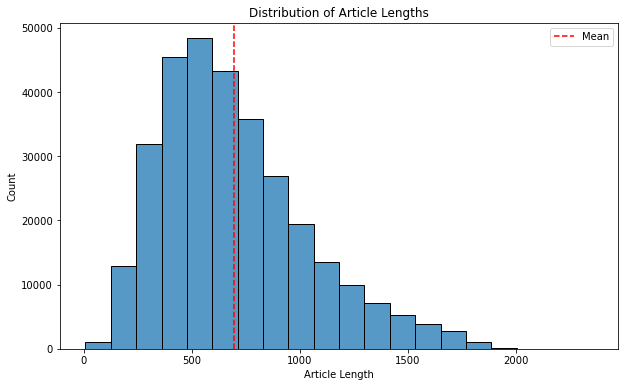

In [26]:
# Calculate article lengths
ats_data['article_length'] = ats_data['article'].str.split().apply(len)

# Bar chart of article lengths with custom colors
plt.figure(figsize=(10, 6))
sns.histplot(ats_data['article_length'], bins=20, color='#1f77b4')  # Set custom color
plt.axvline(ats_data['article_length'].mean(), color='red', linestyle='--', label='Mean')  # Add a vertical line for mean article length
plt.xlabel('Article Length')
plt.ylabel('Count')
plt.title('Distribution of Article Lengths')
plt.legend()
plt.show()

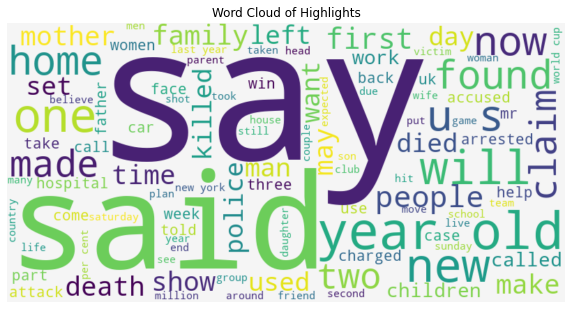

In [24]:
# Example: Word cloud of highlights
from wordcloud import WordCloud

plt.figure(figsize=(10, 8))
wordcloud = WordCloud(background_color='whitesmoke', width=800, height=400, max_words=100).generate(' '.join(ats_data['highlights']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Highlights')
plt.show()

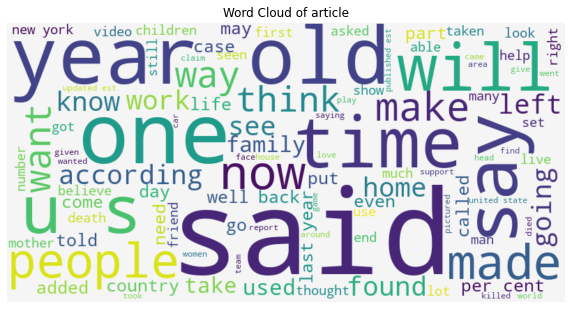

In [25]:
plt.figure(figsize=(10, 8))
wordcloud = WordCloud(background_color='whitesmoke', width=800, height=400, max_words=100).generate(' '.join(ats_data['article']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of article')
plt.show()

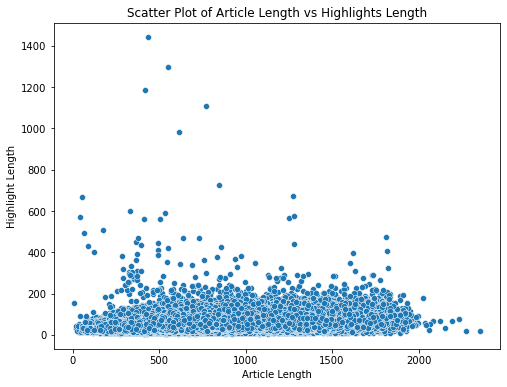

In [26]:
# Example: Scatter plot of article length vs highlight length
ats_data['highlights_length'] = ats_data['highlights'].str.split().apply(len)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='article_length', y='highlights_length', data=ats_data)
plt.xlabel('Article Length')
plt.ylabel('Highlight Length')
plt.title('Scatter Plot of Article Length vs Highlights Length')
plt.show()

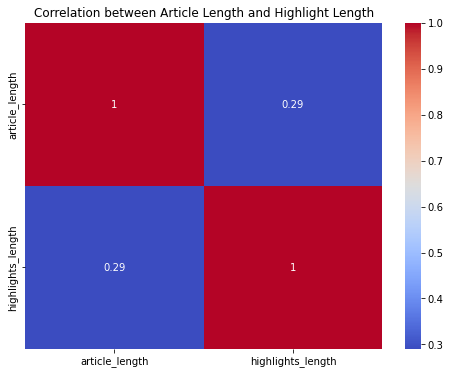

In [27]:
correlation = ats_data[['article_length', 'highlights_length']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Article Length and Highlight Length')
plt.show()

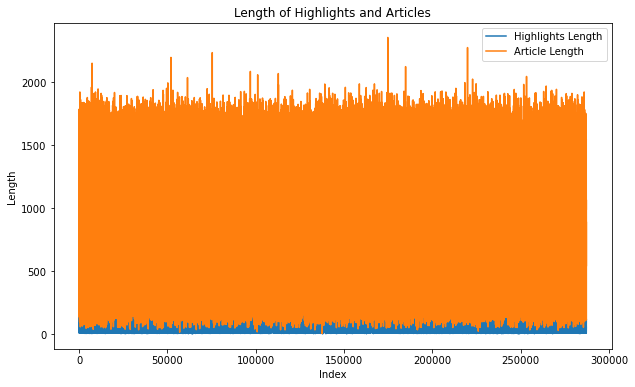

In [28]:
# Create a line graph with two lines
plt.figure(figsize=(10, 6))
plt.plot(ats_data['highlights_length'], label='Highlights Length')
plt.plot(ats_data['article_length'], label='Article Length')
plt.xlabel('Index')
plt.ylabel('Length')
plt.title('Length of Highlights and Articles')
plt.legend()
plt.show()